In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import tensorflow as tf

In [74]:
df = pd.read_csv('AviationData.csv', low_memory=False)

In [75]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

## Data Cleaning and Preprocessing

In [77]:
df.drop_duplicates()
df.shape

(88889, 31)

In [78]:
# Renaming columns to a more easily usable format
df.columns = df.columns.str.replace(' ','')
df.columns = df.columns.str.replace('.','_').str.lower()
df.head()

,event_id,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,...,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [79]:
# How many of the events are classified as accidents?
df.loc[df.investigation_type == 'Accident'].shape 

(85015, 31)

In [80]:
# Since we don't have duplicates, we can drop the event_id column
df.drop(columns='event_id', inplace=True)
df.head()

,investigation_type,accident_number,event_date,location,country,latitude,longitude,airport_code,airport_name,injury_severity,...,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
0,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [81]:
import datetime as dt

In [82]:
df.event_date = pd.to_datetime(df.event_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   investigation_type      88889 non-null  object        
 1   accident_number         88889 non-null  object        
 2   event_date              88889 non-null  datetime64[ns]
 3   location                88837 non-null  object        
 4   country                 88663 non-null  object        
 5   latitude                34382 non-null  object        
 6   longitude               34373 non-null  object        
 7   airport_code            50132 non-null  object        
 8   airport_name            52704 non-null  object        
 9   injury_severity         87889 non-null  object        
 10  aircraft_damage         85695 non-null  object        
 11  aircraft_category       32287 non-null  object        
 12  registration_number     87507 non-null  object

In [83]:
# Determine which columns have the most null values to help determine which ones are relevant to clean and which ones can be dropped
absent_values = df.isnull().sum().sort_values(ascending=False)
absent_values


schedule                  76307
air_carrier               72241
far_description           56866
aircraft_category         56602
longitude                 54516
latitude                  54507
airport_code              38757
airport_name              36185
broad_phase_of_flight     27165
publication_date          13771
total_serious_injuries    12510
total_minor_injuries      11933
total_fatal_injuries      11401
engine_type                7096
report_status              6384
purpose_of_flight          6192
number_of_engines          6084
total_uninjured            5912
weather_condition          4492
aircraft_damage            3194
registration_number        1382
injury_severity            1000
country                     226
amateur_built               102
model                        92
make                         63
location                     52
accident_number               0
event_date                    0
investigation_type            0
dtype: int64

In [84]:
# Schedule, longitude, latitude, registration number, accident number, airport name and code are not relevant to this analysis, so we can drop them
df = df.drop(columns=[
    'schedule', 
    'latitude', 
    'longitude',
    'registration_number',
    'accident_number',
    'airport_code',
    'airport_name'])

In [85]:
df.head()

,investigation_type,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,...,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,172M,No,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,112,No,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,501,No,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [86]:
# Since we are interested in only accidents and not incidents, we cal also drop those
df = df.loc[df.investigation_type == 'Accident']


In [87]:
df.purpose_of_flight.value_counts()

purpose_of_flight
Personal                     49181
Instructional                10475
Unknown                       5543
Aerial Application            4704
Business                      3904
Positioning                   1561
Other Work Use                1237
Aerial Observation             791
Ferry                          787
Public Aircraft                695
Executive/corporate            503
Flight Test                    393
Skydiving                      181
External Load                  122
Public Aircraft - Federal      103
Banner Tow                     101
Air Race show                   98
Public Aircraft - Local         73
Public Aircraft - State         62
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: count, dtype: int64

In [88]:
df.loc[df.purpose_of_flight == 'Air Race show', 'purpose_of_flight'] = 'Air race or show'
df.loc[df.purpose_of_flight == 'Air Race/show', 'purpose_of_flight'] = 'Air race or show'
df.loc[df.purpose_of_flight == 'ASHO', 'purpose_of_flight'] = 'Air race or show'


In [89]:
df.loc[(df.purpose_of_flight == 'Public Aircraft - Federal') | (df.purpose_of_flight == 'Public Aircraft - Local') | (df.purpose_of_flight == 'Public Aircraft - State') | (df.purpose_of_flight == 'PUBL') | (df.purpose_of_flight == 'PUBS'), 'purpose_of_flight'] = 'Public Aircraft'

In [90]:
df.purpose_of_flight.value_counts()

purpose_of_flight
Personal               49181
Instructional          10475
Unknown                 5543
Aerial Application      4704
Business                3904
Positioning             1561
Other Work Use          1237
Public Aircraft          938
Aerial Observation       791
Ferry                    787
Executive/corporate      503
Flight Test              393
Skydiving                181
Air race or show         163
External Load            122
Banner Tow               101
Glider Tow                53
Firefighting              40
Air Drop                  11
Name: count, dtype: int64

In [91]:
df.columns

Index(['investigation_type', 'event_date', 'location', 'country',
       'injury_severity', 'aircraft_damage', 'aircraft_category', 'make',
       'model', 'amateur_built', 'number_of_engines', 'engine_type',
       'far_description', 'purpose_of_flight', 'air_carrier',
       'total_fatal_injuries', 'total_serious_injuries',
       'total_minor_injuries', 'total_uninjured', 'weather_condition',
       'broad_phase_of_flight', 'report_status', 'publication_date'],
      dtype='object')

In [92]:
df.number_of_engines.value_counts()

number_of_engines
1.0    69069
2.0     9405
0.0     1205
4.0      225
3.0      207
8.0        3
6.0        1
Name: count, dtype: int64

In [93]:
df.loc[df.number_of_engines == 0].aircraft_category.value_counts()

aircraft_category
Glider          347
Balloon         149
Airplane          8
Weight-Shift      1
Name: count, dtype: int64

In [94]:
# Airplanes without engines is most definitely an error in the data
df[(df.number_of_engines == 0) & (df.aircraft_category == 'Airplane')]

,investigation_type,event_date,location,country,injury_severity,aircraft_damage,aircraft_category,make,model,amateur_built,...,purpose_of_flight,air_carrier,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
19931,Accident,1988-03-27,"OXFORD, United Kingdom",United Kingdom,Fatal(1),Destroyed,Airplane,Piper,PA-38,No,...,Instructional,NaN,1.0,NaN,NaN,NaN,UNK,NaN,Foreign,NaN
21901,Accident,1988-11-14,"PANAMA CITY, Panama",Panama,Non-Fatal,NaN,Airplane,Airbus Industrie,A-300B4-203,No,...,Unknown,NaN,NaN,1.0,4.0,222.0,VMC,NaN,Foreign,06-02-1995
26162,Accident,1990-07-27,"BHARU, Malaysia",Malaysia,Non-Fatal,NaN,Airplane,Mcdonnell Douglas,DC-10-30,No,...,Unknown,NaN,NaN,1.0,3.0,3.0,UNK,NaN,Foreign,07-02-1995
27319,Accident,1991-01-25,"PINEDALE, WY",United States,Non-Fatal,Substantial,Airplane,Piper,PA-34,No,...,Public Aircraft,NaN,NaN,NaN,NaN,1.0,UNK,Landing,Probable Cause,31-01-2018
32014,Accident,1992-12-29,"LORETO, MEXICO",Mexico,Non-Fatal,Substantial,Airplane,Piper,PA-34-200,No,...,Personal,NaN,NaN,NaN,NaN,2.0,VMC,NaN,Foreign,05-08-1996
61006,Accident,2006-07-09,"ENUMCLAW, WA",United States,Non-Fatal,Substantial,Airplane,Rolladen-schneider,LS3A,No,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,Landing,Probable Cause,31-10-2006
64874,Accident,2008-07-05,"Beloit, WI",United States,Non-Fatal,Substantial,Airplane,AB Sportine Aviacija,Genesis 2,No,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,The inadequate visual lookout by the driver of...,25-09-2020
76788,Accident,2015-06-14,"Pell City, AL",United States,Non-Fatal,Substantial,Airplane,WEATHERLY,201B,No,...,Aerial Application,Cobb Aerial Solutions LLC,0.0,0.0,0.0,1.0,VMC,NaN,The inadequate inspection of the airplane's la...,02-02-2021


In [95]:
# Since there are only 8 entries with this problem and we are not interested in non-airplane craft, we can drop the irrelevant data
df.drop(df[df.aircraft_category != 'Airplane'].index, inplace=True)
df.drop(df[df.number_of_engines == 0].index, inplace=True)


In [96]:
df.aircraft_category.value_counts()

aircraft_category
Airplane    25955
Name: count, dtype: int64

In [97]:
df.number_of_engines.value_counts()

number_of_engines
1.0    21012
2.0     2857
4.0       52
3.0       30
8.0        1
6.0        1
Name: count, dtype: int64

In [98]:
# We can now remove both the investigation_type and aircraft_category columns
df.drop(['investigation_type', 'aircraft_category', 'air_carrier'], axis=1, inplace=True)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25955 entries, 5 to 88886
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   event_date              25955 non-null  datetime64[ns]
 1   location                25952 non-null  object        
 2   country                 25948 non-null  object        
 3   injury_severity         25729 non-null  object        
 4   aircraft_damage         25499 non-null  object        
 5   make                    25947 non-null  object        
 6   model                   25929 non-null  object        
 7   amateur_built           25948 non-null  object        
 8   number_of_engines       23953 non-null  float64       
 9   engine_type             22585 non-null  object        
 10  far_description         25660 non-null  object        
 11  purpose_of_flight       23486 non-null  object        
 12  total_fatal_injuries    22922 non-null  float64    

In [100]:
df.head()

,event_date,location,country,injury_severity,aircraft_damage,make,model,amateur_built,number_of_engines,engine_type,far_description,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date
5,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,Part 129: Foreign,NaN,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
7,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Cessna,140,No,1.0,Reciprocating,Part 91: General Aviation,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Cessna,401B,No,2.0,Reciprocating,Part 91: General Aviation,Business,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
12,1982-01-02,"HOMER, LA",United States,Non-Fatal,Destroyed,Bellanca,17-30A,No,1.0,Reciprocating,Part 91: General Aviation,Personal,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
13,1982-01-02,"HEARNE, TX",United States,Fatal(1),Destroyed,Cessna,R172K,No,1.0,Reciprocating,Part 91: General Aviation,Personal,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983


In [101]:
# Let's extract number of fatalities from the injury_severity column
df['fatalities'] = df.injury_severity.str.extract(r'(\d)')

In [102]:
df.columns

Index(['event_date', 'location', 'country', 'injury_severity',
       'aircraft_damage', 'make', 'model', 'amateur_built',
       'number_of_engines', 'engine_type', 'far_description',
       'purpose_of_flight', 'total_fatal_injuries', 'total_serious_injuries',
       'total_minor_injuries', 'total_uninjured', 'weather_condition',
       'broad_phase_of_flight', 'report_status', 'publication_date',
       'fatalities'],
      dtype='object')

In [103]:
df.head()

,event_date,location,country,injury_severity,aircraft_damage,make,model,amateur_built,number_of_engines,engine_type,...,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date,fatalities
5,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,...,NaN,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017,NaN
7,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Cessna,140,No,1.0,Reciprocating,...,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,NaN
8,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Cessna,401B,No,2.0,Reciprocating,...,Business,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,NaN
12,1982-01-02,"HOMER, LA",United States,Non-Fatal,Destroyed,Bellanca,17-30A,No,1.0,Reciprocating,...,Personal,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983,NaN
13,1982-01-02,"HEARNE, TX",United States,Fatal(1),Destroyed,Cessna,R172K,No,1.0,Reciprocating,...,Personal,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983,1


In [104]:
df.injury_severity = df.injury_severity.str.strip('()1234567890')

In [105]:
df.head()

,event_date,location,country,injury_severity,aircraft_damage,make,model,amateur_built,number_of_engines,engine_type,...,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date,fatalities
5,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,...,NaN,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017,NaN
7,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Cessna,140,No,1.0,Reciprocating,...,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,NaN
8,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Cessna,401B,No,2.0,Reciprocating,...,Business,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,NaN
12,1982-01-02,"HOMER, LA",United States,Non-Fatal,Destroyed,Bellanca,17-30A,No,1.0,Reciprocating,...,Personal,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983,NaN
13,1982-01-02,"HEARNE, TX",United States,Fatal,Destroyed,Cessna,R172K,No,1.0,Reciprocating,...,Personal,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983,1


In [106]:
df.injury_severity.value_counts()

injury_severity
Non-Fatal      20238
Fatal           5179
Minor            164
Serious          127
Unavailable       21
Name: count, dtype: int64

In [107]:
df.fatalities = df.fatalities.fillna(0).astype(int)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25955 entries, 5 to 88886
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   event_date              25955 non-null  datetime64[ns]
 1   location                25952 non-null  object        
 2   country                 25948 non-null  object        
 3   injury_severity         25729 non-null  object        
 4   aircraft_damage         25499 non-null  object        
 5   make                    25947 non-null  object        
 6   model                   25929 non-null  object        
 7   amateur_built           25948 non-null  object        
 8   number_of_engines       23953 non-null  float64       
 9   engine_type             22585 non-null  object        
 10  far_description         25660 non-null  object        
 11  purpose_of_flight       23486 non-null  object        
 12  total_fatal_injuries    22922 non-null  float64    

In [109]:
df.far_description.value_counts()

far_description
091                               15747
Part 91: General Aviation          5609
NUSN                               1068
137                                 739
135                                 498
121                                 396
Part 137: Agricultural              360
NUSC                                344
Part 135: Air Taxi & Commuter       204
UNK                                 175
PUBU                                124
Part 121: Air Carrier                96
129                                  75
Non-U.S., Non-Commercial             75
Part 129: Foreign                    53
Non-U.S., Commercial                 51
Unknown                              14
Public Use                           12
091K                                  8
125                                   4
Part 125: 20+ Pax,6000+ lbs           3
Part 133: Rotorcraft Ext. Load        2
Part 91 Subpart K: Fractional         1
ARMF                                  1
107                     

In [110]:
# This column is messy and irrelevant so we can drop it
df.drop('far_description', axis=1, inplace=True)

In [111]:
df.aircraft_damage.value_counts()

aircraft_damage
Substantial    21689
Destroyed       3551
Minor            181
Unknown           78
Name: count, dtype: int64

In [112]:
df.columns

Index(['event_date', 'location', 'country', 'injury_severity',
       'aircraft_damage', 'make', 'model', 'amateur_built',
       'number_of_engines', 'engine_type', 'purpose_of_flight',
       'total_fatal_injuries', 'total_serious_injuries',
       'total_minor_injuries', 'total_uninjured', 'weather_condition',
       'broad_phase_of_flight', 'report_status', 'publication_date',
       'fatalities'],
      dtype='object')

In [113]:
df.head()

,event_date,location,country,injury_severity,aircraft_damage,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,broad_phase_of_flight,report_status,publication_date,fatalities
5,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,NaN,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017,0
7,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,0
8,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Cessna,401B,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,0
12,1982-01-02,"HOMER, LA",United States,Non-Fatal,Destroyed,Bellanca,17-30A,No,1.0,Reciprocating,Personal,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983,0
13,1982-01-02,"HEARNE, TX",United States,Fatal,Destroyed,Cessna,R172K,No,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983,1


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25955 entries, 5 to 88886
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   event_date              25955 non-null  datetime64[ns]
 1   location                25952 non-null  object        
 2   country                 25948 non-null  object        
 3   injury_severity         25729 non-null  object        
 4   aircraft_damage         25499 non-null  object        
 5   make                    25947 non-null  object        
 6   model                   25929 non-null  object        
 7   amateur_built           25948 non-null  object        
 8   number_of_engines       23953 non-null  float64       
 9   engine_type             22585 non-null  object        
 10  purpose_of_flight       23486 non-null  object        
 11  total_fatal_injuries    22922 non-null  float64       
 12  total_serious_injuries  22862 non-null  float64    

In [115]:
# Broad phase of flight is a relevant metric, however, there are many null values. Since the dataset is big, we can remove this column. We can go back and analyse this metric but we can't use it for a complete analysis of this dataset
df.drop(['broad_phase_of_flight'], axis=1, inplace=True)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25955 entries, 5 to 88886
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   event_date              25955 non-null  datetime64[ns]
 1   location                25952 non-null  object        
 2   country                 25948 non-null  object        
 3   injury_severity         25729 non-null  object        
 4   aircraft_damage         25499 non-null  object        
 5   make                    25947 non-null  object        
 6   model                   25929 non-null  object        
 7   amateur_built           25948 non-null  object        
 8   number_of_engines       23953 non-null  float64       
 9   engine_type             22585 non-null  object        
 10  purpose_of_flight       23486 non-null  object        
 11  total_fatal_injuries    22922 non-null  float64       
 12  total_serious_injuries  22862 non-null  float64    

In [117]:
df.report_status.value_counts()

report_status
Probable Cause                                                                                                                                                                                                                                 6240
Foreign                                                                                                                                                                                                                                         240
<br /><br />                                                                                                                                                                                                                                     79
The pilot's failure to maintain directional control during the landing roll.                                                                                                                                                                     56
A loss of 

In [118]:
# This column does have interesting information, but it is very messy and we can't clean it without changing the values by hand, so we'll drop it. The publication date of the report is not relevant, so we'll drop it as well
df.drop(['publication_date', 'report_status'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25955 entries, 5 to 88886
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   event_date              25955 non-null  datetime64[ns]
 1   location                25952 non-null  object        
 2   country                 25948 non-null  object        
 3   injury_severity         25729 non-null  object        
 4   aircraft_damage         25499 non-null  object        
 5   make                    25947 non-null  object        
 6   model                   25929 non-null  object        
 7   amateur_built           25948 non-null  object        
 8   number_of_engines       23953 non-null  float64       
 9   engine_type             22585 non-null  object        
 10  purpose_of_flight       23486 non-null  object        
 11  total_fatal_injuries    22922 non-null  float64       
 12  total_serious_injuries  22862 non-null  float64    

In [119]:
df.isnull().sum().sort_values(ascending=False)

engine_type               3370
total_serious_injuries    3093
total_fatal_injuries      3033
total_minor_injuries      2752
purpose_of_flight         2469
weather_condition         2012
number_of_engines         2002
total_uninjured            859
aircraft_damage            456
injury_severity            226
model                       26
make                         8
country                      7
amateur_built                7
location                     3
event_date                   0
fatalities                   0
dtype: int64

In [120]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17672 entries, 7 to 88767
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   event_date              17672 non-null  datetime64[ns]
 1   location                17672 non-null  object        
 2   country                 17672 non-null  object        
 3   injury_severity         17672 non-null  object        
 4   aircraft_damage         17672 non-null  object        
 5   make                    17672 non-null  object        
 6   model                   17672 non-null  object        
 7   amateur_built           17672 non-null  object        
 8   number_of_engines       17672 non-null  float64       
 9   engine_type             17672 non-null  object        
 10  purpose_of_flight       17672 non-null  object        
 11  total_fatal_injuries    17672 non-null  float64       
 12  total_serious_injuries  17672 non-null  float64    

In [121]:
df.number_of_engines = df.number_of_engines.astype('int16')
df.total_fatal_injuries = df.total_fatal_injuries.astype('int16')
df.total_minor_injuries = df.total_minor_injuries.astype('int16')
df.total_serious_injuries = df.total_serious_injuries.astype('int16')
df.total_uninjured = df.total_uninjured.astype('int16')


In [122]:
df.drop('fatalities', inplace=True, axis=1)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17672 entries, 7 to 88767
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   event_date              17672 non-null  datetime64[ns]
 1   location                17672 non-null  object        
 2   country                 17672 non-null  object        
 3   injury_severity         17672 non-null  object        
 4   aircraft_damage         17672 non-null  object        
 5   make                    17672 non-null  object        
 6   model                   17672 non-null  object        
 7   amateur_built           17672 non-null  object        
 8   number_of_engines       17672 non-null  int16         
 9   engine_type             17672 non-null  object        
 10  purpose_of_flight       17672 non-null  object        
 11  total_fatal_injuries    17672 non-null  int16         
 12  total_serious_injuries  17672 non-null  int16      

In [124]:
# Even dropping any entries with null values, we have 17k+ entries to analyze. This means we can still gleam a lot of information from this data, even if it's not all the data. We can also train our model to predict some information for the removed data and see how well it can generalize

## Exploratory analysis and attribute engineering

In [125]:
# Let's extract the year of the accident from the date
df.head()

,event_date,location,country,injury_severity,aircraft_damage,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition
7,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Cessna,140,No,1,Reciprocating,Personal,0,0,0,2,VMC
8,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Cessna,401B,No,2,Reciprocating,Business,0,0,0,2,IMC
12,1982-01-02,"HOMER, LA",United States,Non-Fatal,Destroyed,Bellanca,17-30A,No,1,Reciprocating,Personal,0,0,1,0,IMC
13,1982-01-02,"HEARNE, TX",United States,Fatal,Destroyed,Cessna,R172K,No,1,Reciprocating,Personal,1,0,0,0,IMC
14,1982-01-02,"CHICKASHA, OK",United States,Fatal,Destroyed,Navion,A,No,1,Reciprocating,Personal,1,0,0,0,IMC


In [126]:
df.set_index('event_date', inplace=True)

In [127]:
df.head()

,location,country,injury_severity,aircraft_damage,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition
event_date,,,,,,,,,,,,,,,
1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Cessna,140,No,1,Reciprocating,Personal,0,0,0,2,VMC
1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Cessna,401B,No,2,Reciprocating,Business,0,0,0,2,IMC
1982-01-02,"HOMER, LA",United States,Non-Fatal,Destroyed,Bellanca,17-30A,No,1,Reciprocating,Personal,0,0,1,0,IMC
1982-01-02,"HEARNE, TX",United States,Fatal,Destroyed,Cessna,R172K,No,1,Reciprocating,Personal,1,0,0,0,IMC
1982-01-02,"CHICKASHA, OK",United States,Fatal,Destroyed,Navion,A,No,1,Reciprocating,Personal,1,0,0,0,IMC


In [128]:
df['year'] = df.index.year

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17672 entries, 1982-01-01 to 2022-11-09
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   location                17672 non-null  object
 1   country                 17672 non-null  object
 2   injury_severity         17672 non-null  object
 3   aircraft_damage         17672 non-null  object
 4   make                    17672 non-null  object
 5   model                   17672 non-null  object
 6   amateur_built           17672 non-null  object
 7   number_of_engines       17672 non-null  int16 
 8   engine_type             17672 non-null  object
 9   purpose_of_flight       17672 non-null  object
 10  total_fatal_injuries    17672 non-null  int16 
 11  total_serious_injuries  17672 non-null  int16 
 12  total_minor_injuries    17672 non-null  int16 
 13  total_uninjured         17672 non-null  int16 
 14  weather_condition       17672 non-nul

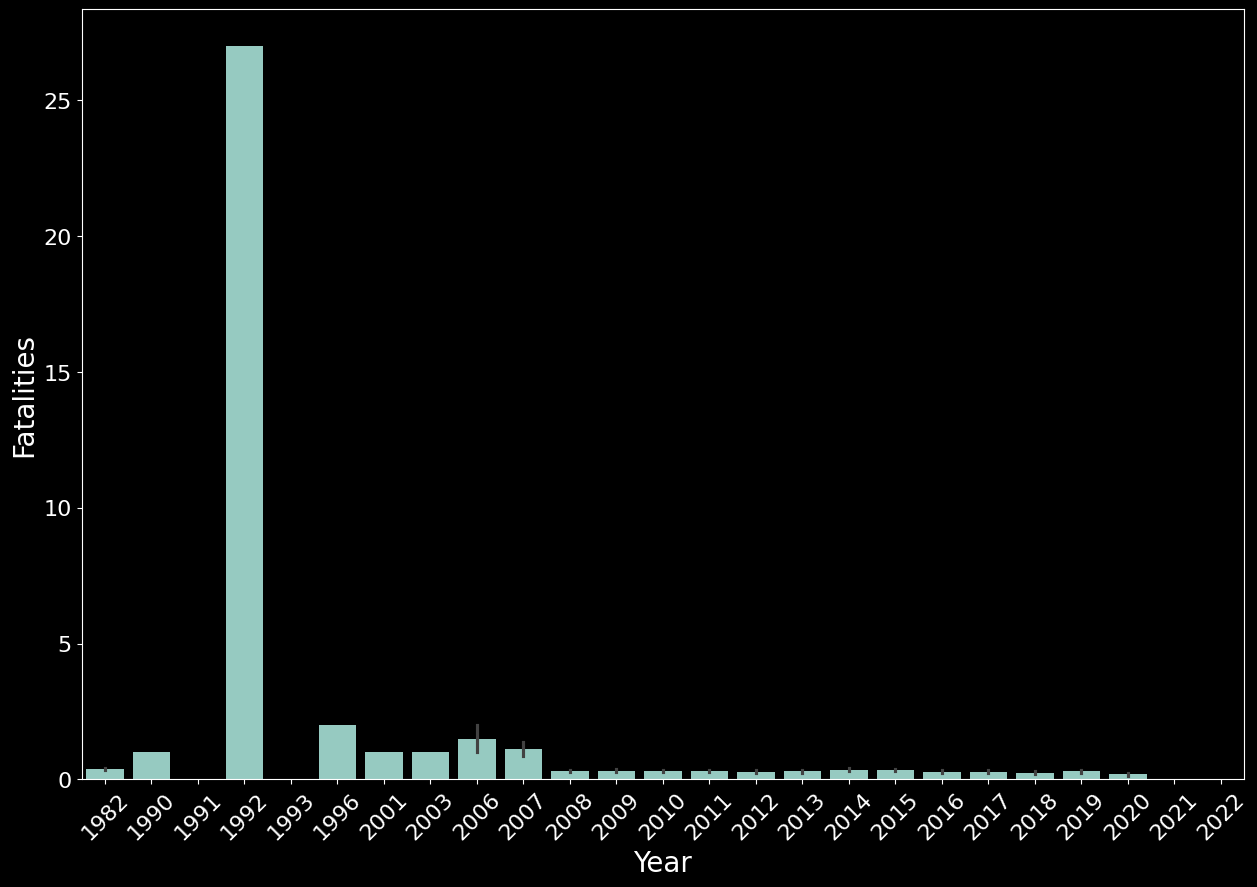

In [130]:
# Now we can look at the trend based on the year
fig = plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 16})
sns.barplot(x = df.year, y = df.total_fatal_injuries)
plt.xticks(rotation = 45)
plt.ylabel('Fatalities', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.show()

In [132]:
df_box = df.drop(columns=[
    'country',
    'location',
    'injury_severity',
    'aircraft_damage',
    'make',
    'model',
    'amateur_built',
    'engine_type',
    'purpose_of_flight',
    'weather_condition'
])

In [133]:
df_box.columns

Index(['number_of_engines', 'total_fatal_injuries', 'total_serious_injuries',
       'total_minor_injuries', 'total_uninjured', 'year'],
      dtype='object')

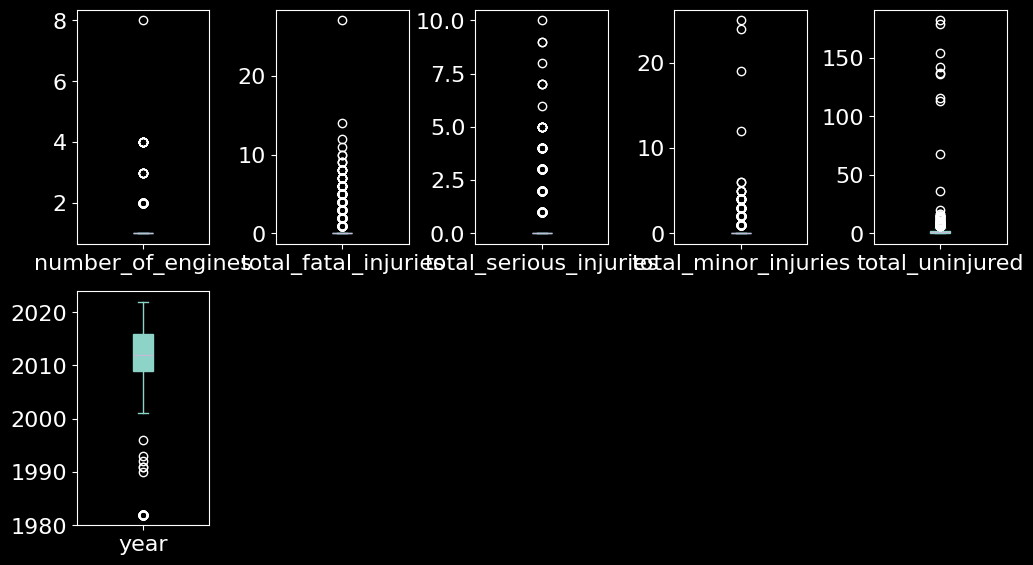

In [134]:
df_box.plot(subplots = True, layout = (4,5), kind = 'box', figsize = (12,14), patch_artist = True)
plt.subplots_adjust(wspace=0.5)

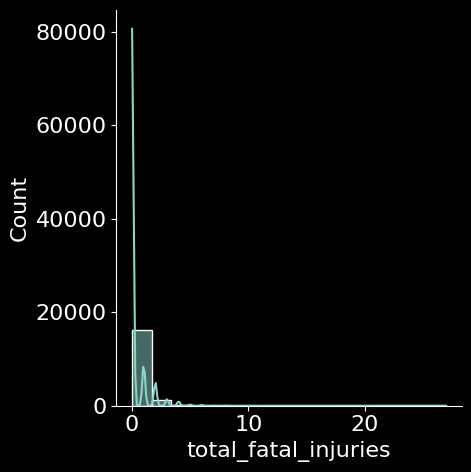

In [135]:
sns.displot(df_box, x=df_box.total_fatal_injuries, kde=True)

In [136]:
df_fatal = df.loc[df.total_fatal_injuries > 0]

In [139]:
df_fatal.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3076 entries, 1982-01-02 to 2022-04-05
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   location                3076 non-null   object
 1   country                 3076 non-null   object
 2   injury_severity         3076 non-null   object
 3   aircraft_damage         3076 non-null   object
 4   make                    3076 non-null   object
 5   model                   3076 non-null   object
 6   amateur_built           3076 non-null   object
 7   number_of_engines       3076 non-null   int16 
 8   engine_type             3076 non-null   object
 9   purpose_of_flight       3076 non-null   object
 10  total_fatal_injuries    3076 non-null   int16 
 11  total_serious_injuries  3076 non-null   int16 
 12  total_minor_injuries    3076 non-null   int16 
 13  total_uninjured         3076 non-null   int16 
 14  weather_condition       3076 non-null 

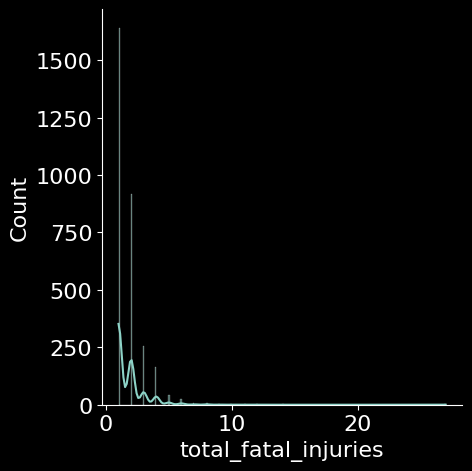

In [150]:
sns.displot(df_fatal, x=df_fatal.total_fatal_injuries, kde=True)


In [151]:
df.injury_severity.value_counts()

injury_severity
Non-Fatal    14509
Fatal         3088
Minor           56
Serious         19
Name: count, dtype: int64

<Axes: xlabel='total_fatal_injuries'>

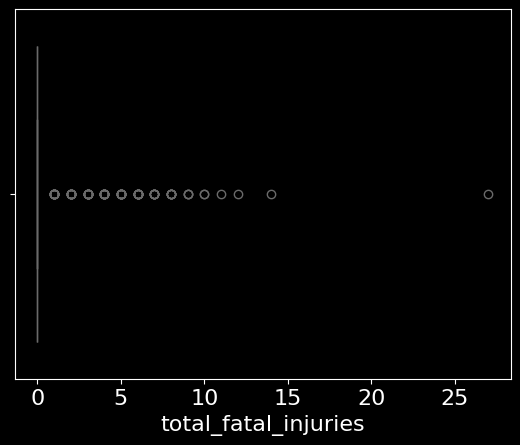

In [153]:
sns.boxplot(df_fatal, x=df.total_fatal_injuries)

In [154]:
df_fatal.describe()

,number_of_engines,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,year
count,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000,3076.000000
mean,1.153446,1.792913,0.077373,0.146619,0.134915,2007.408973
std,0.374632,1.269157,0.444509,0.664764,4.127048,12.498709
min,1.000000,1.000000,0.000000,0.000000,0.000000,1982.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,2008.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,2012.000000
75%,1.000000,2.000000,0.000000,0.000000,0.000000,2015.000000
max,4.000000,27.000000,10.000000,24.000000,182.000000,2022.000000


In [155]:
Q1 = df_fatal.total_fatal_injuries.quantile(0.25)
Q3 = df_fatal.total_fatal_injuries.quantile(0.75)

In [158]:
df_fatal.loc[df_fatal.total_fatal_injuries > Q3]

,location,country,injury_severity,aircraft_damage,make,model,amateur_built,number_of_engines,engine_type,purpose_of_flight,total_fatal_injuries,total_serious_injuries,total_minor_injuries,total_uninjured,weather_condition,year
event_date,,,,,,,,,,,,,,,,
1982-01-02,"SKWENTA, AK",United States,Fatal,Destroyed,Cessna,180,No,1,Reciprocating,Personal,3,0,0,0,VMC,1982
1982-01-03,"ASHLAND, VA",United States,Fatal,Destroyed,Cessna,414A,No,2,Reciprocating,Business,8,0,0,0,IMC,1982
1982-01-04,"PLEASANT HILL, OR",United States,Fatal,Destroyed,Piper,PA-28-161,No,1,Reciprocating,Personal,4,0,0,0,VMC,1982
1982-01-05,"RAMONA, CA",United States,Fatal,Destroyed,Navion,A,No,1,Reciprocating,Business,3,0,0,0,IMC,1982
1982-01-11,"RIVERTON, WY",United States,Fatal,Destroyed,Cessna,210N,No,1,Reciprocating,Personal,4,1,1,0,IMC,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-05,"Eatonton, GA",United States,Fatal,Destroyed,Piper,PA 31T,No,2,Turbo Prop,Personal,5,0,0,0,IMC,2020
2020-07-25,"West Jordan, UT",United States,Fatal,Substantial,Piper,PA32R,No,1,Reciprocating,Personal,3,1,2,0,VMC,2020
2020-08-30,"Bryan, TX",United States,Fatal,Substantial,Piper,PA24,No,1,Reciprocating,Personal,3,0,1,0,VMC,2020
